In [ ]:
!conda install tensorflow

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
tf.__version__

'2.9.1'

In [3]:
data = pd.read_csv('cardio_train1.csv')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

In [6]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(X)

In [7]:
X

array([[0.58807588, 1.        , 0.57948718, ..., 0.        , 0.        ,
        1.        ],
       [0.73015873, 0.        , 0.51794872, ..., 0.        , 0.        ,
        1.        ],
       [0.6240031 , 0.        , 0.56410256, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.64018583, 1.        , 0.65641026, ..., 0.        , 1.        ,
        0.        ],
       [0.90073558, 0.        , 0.55384615, ..., 0.        , 0.        ,
        0.        ],
       [0.75431669, 0.        , 0.58974359, ..., 0.        , 0.        ,
        1.        ]])

In [8]:
np.shape(X)

(70000, 11)

In [9]:
y = pd.get_dummies(y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33123)

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(11, activation='relu', input_shape=(11,)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 30)                360       
                                                                 
 dense_2 (Dense)             (None, 2)                 62        
                                                                 
Total params: 554
Trainable params: 554
Non-trainable params: 0
_________________________________________________________________


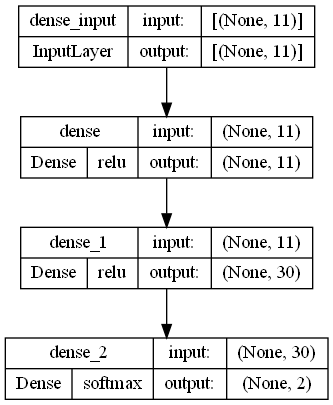

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_activations=True, show_shapes=True)

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [13]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=100)

Epoch 1/10
525/525 [==============================] - 1s 2ms/step - loss: 0.6566 - categorical_accuracy: 0.6018 - val_loss: 0.6420 - val_categorical_accuracy: 0.6285
Epoch 2/10
525/525 [==============================] - 1s 1ms/step - loss: 0.6334 - categorical_accuracy: 0.6402 - val_loss: 0.6345 - val_categorical_accuracy: 0.6371
Epoch 3/10
525/525 [==============================] - 1s 1ms/step - loss: 0.6301 - categorical_accuracy: 0.6429 - val_loss: 0.6323 - val_categorical_accuracy: 0.6395
Epoch 4/10
525/525 [==============================] - 1s 1ms/step - loss: 0.6279 - categorical_accuracy: 0.6439 - val_loss: 0.6302 - val_categorical_accuracy: 0.6412
Epoch 5/10
525/525 [==============================] - 1s 1ms/step - loss: 0.6268 - categorical_accuracy: 0.6476 - val_loss: 0.6303 - val_categorical_accuracy: 0.6393
Epoch 6/10
525/525 [==============================] - 1s 1ms/step - loss: 0.6258 - categorical_accuracy: 0.6465 - val_loss: 0.6332 - val_categorical_accuracy: 0.6389
Epoc

In [14]:
from sklearn.ensemble import RandomForestClassifier
yr = data.iloc[:, -1]

In [15]:
np.unique(yr, return_counts=True)

(array([0, 1], dtype=int64), array([35021, 34979], dtype=int64))

In [16]:
rfc = RandomForestClassifier(n_estimators=200)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X, yr, random_state=33123)

In [17]:
rfc.fit(Xr_train, yr_train)

RandomForestClassifier(n_estimators=200)

In [18]:
from sklearn.metrics import classification_report

In [19]:
y_pred = rfc.predict(Xr_test)
print(classification_report(y_true=yr_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      8652
           1       0.72      0.71      0.71      8848

    accuracy                           0.71     17500
   macro avg       0.71      0.71      0.71     17500
weighted avg       0.71      0.71      0.71     17500



In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(11, activation='relu', input_shape=(11,)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [21]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=100)

Epoch 1/50
525/525 [==============================] - 1s 2ms/step - loss: 0.6481 - categorical_accuracy: 0.6220 - val_loss: 0.6442 - val_categorical_accuracy: 0.6306
Epoch 2/50
525/525 [==============================] - 1s 2ms/step - loss: 0.6341 - categorical_accuracy: 0.6404 - val_loss: 0.6350 - val_categorical_accuracy: 0.6374
Epoch 3/50
525/525 [==============================] - 1s 2ms/step - loss: 0.6306 - categorical_accuracy: 0.6432 - val_loss: 0.6314 - val_categorical_accuracy: 0.6445
Epoch 4/50
525/525 [==============================] - 1s 2ms/step - loss: 0.6284 - categorical_accuracy: 0.6454 - val_loss: 0.6301 - val_categorical_accuracy: 0.6410
Epoch 5/50
525/525 [==============================] - 1s 2ms/step - loss: 0.6278 - categorical_accuracy: 0.6457 - val_loss: 0.6309 - val_categorical_accuracy: 0.6447
Epoch 6/50
525/525 [==============================] - 1s 2ms/step - loss: 0.6255 - categorical_accuracy: 0.6487 - val_loss: 0.6314 - val_categorical_accuracy: 0.6393
Epoc

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 30)                360       
                                                                 
 dense_5 (Dense)             (None, 60)                1860      
                                                                 
 dense_6 (Dense)             (None, 25)                1525      
                                                                 
 dense_7 (Dense)             (None, 2)                 52        
                                                                 
Total params: 3,929
Trainable params: 3,929
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.predict(X_test)[3]

547/547 [==============================] - 1s 986us/step


array([0.69413435, 0.30586565], dtype=float32)

In [27]:
np.argmax(model.predict(X_test)[3])

547/547 [==============================] - 0s 746us/step


0

In [26]:
y_pred = np.argmax(model.predict(Xr_test), axis=1)
print(classification_report(y_true=yr_test, y_pred=y_pred))

547/547 [==============================] - 0s 788us/step
              precision    recall  f1-score   support

           0       0.66      0.83      0.74      8652
           1       0.78      0.58      0.67      8848

    accuracy                           0.71     17500
   macro avg       0.72      0.71      0.70     17500
weighted avg       0.72      0.71      0.70     17500



In [7]:
import numpy as np
sample_output = [
    [0.7, 0.3],
    [0.6, 0.4],
    [0.1, 0.9]
]

In [4]:
final_prediciton = []
for x in sample_output:
    if x[1] > 0.3:
        final_prediciton.append(1)
    else:
        final_prediciton.append(0)

In [6]:
final_prediciton

[0, 1, 1]

In [10]:
np.where(np.array(sample_output)[:, 1] > 0.3)

(array([1, 2], dtype=int64),)

In [28]:
# MasoudKaviani.ir